# Facial Expression Recognition

*author: Jamell Dacon (daconjam@msu.edu)*


In [1]:
# Load in models and packages necessary for datasets
# Importing individual libraries make it easy for us to use them without having to call the parent libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import theano

import csv
import scipy.misc
import scipy
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator

/Users/jamelldacon/anaconda3/lib/python3.7/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.


## Data: Attribute Information


Facial Expression labels (target labels)

0: - 4593 images- Angry <br>
1: - 547 images- Disgust<br>
2: - 5121 images- Fear<br>
3: - 8989 images- Happy<br>
4: - 6077 images- Sad<br>
5: - 4002 images- Surprise<br>
6: - 6198 images- Neutral<br>

In [2]:
print("Importing the file")

df = pd.read_csv('fer2013.csv')

df.head()


Importing the file


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
# We first check the df for missing values i.e. null entries
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [4]:
# We can now get the information of each row in the df i.e data types and null entries of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
# Here we define the Training (training), PublicTest (validation), and PrivTest (test) sets
training, val, test = np.split(df, [int(.8*len(df)), int(.9*len(df))])

print('Training: ', len(training))
print('PublicTest: ', len(val))
print('PrivateTest: ', len(test))

Training:  28709
PublicTest:  3589
PrivateTest:  3589


## Data distribution i.e. visualization of each feature

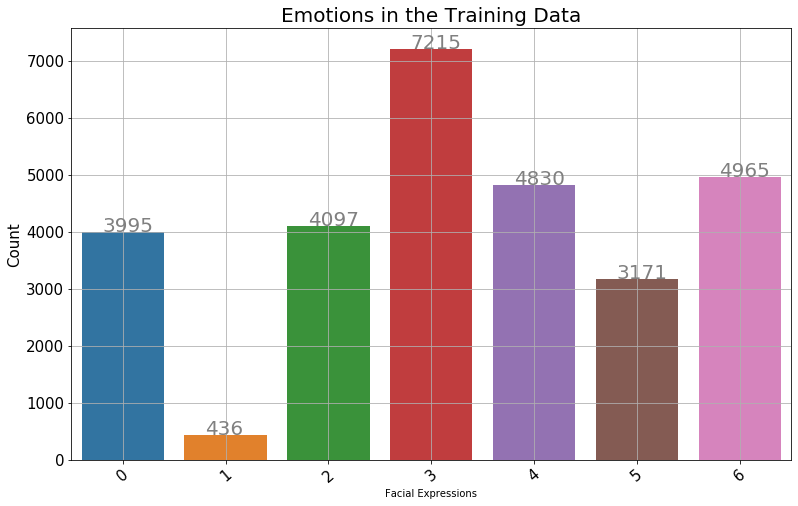

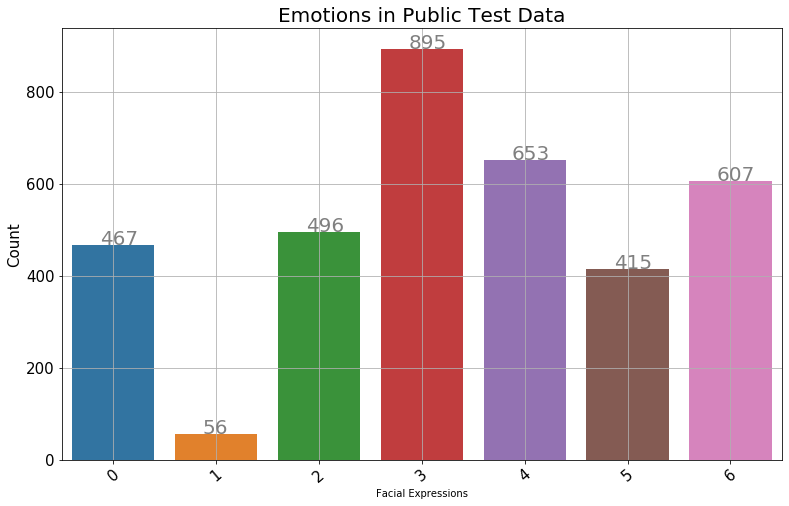

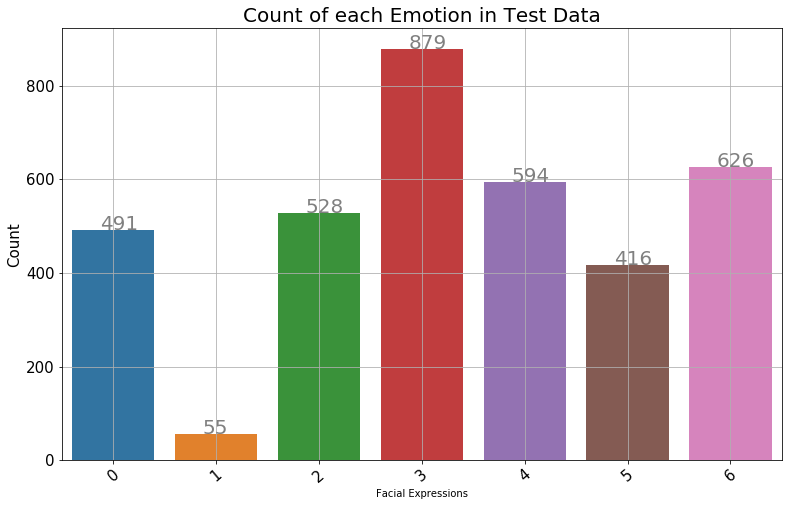

In [7]:
# We can now plot the distribution of emotions throughoout the training,

#labels = ['Angry', 'Digust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Emotions in the Training Data", fontsize = 20)
sns.countplot(x = "emotion", data = training)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Facial Expressions")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()


fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Emotions in Public Test Data", fontsize = 20)
sns.countplot(x = "emotion", data = val)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Facial Expressions")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()


fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "emotion", data = test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Facial Expressions")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()


